## Analysis of Good vs. Great beers - analysis of reviews

In [1]:
import pandas as pd

#create df from reviews
df_reviews = pd.read_csv('reviews.csv')

In [2]:
#create df from combined beers.csv and breweries.csv file
df_bb = pd.read_csv('beers_breweries.csv')

In [3]:
#merge beers/breweries with review
df_all = df_bb.merge(df_reviews, on='beer_id')

#check the number or rows in df_all
df_all.shape

(7524410, 26)

In [4]:
#Will use UM grade definitions to determine good vs. great beer scores
#90%+ grades = Superior Achievement, translates to beers with overall score of 4.5+
#80%-90% grades = Good Achievement, translates to beers with overall score from 4.0 to < 4.5

df_great = df_all[df_all['score'] >= 4.5]
df_good = df_all[(df_all['score'] >= 4.0) & (df_all['score'] < 4.5)]

In [5]:
#size of the df
df_great.shape

(1216462, 26)

In [6]:
#see percentage of rows that have text reviews
df_great[df_great.text != '\xa0\xa0'].shape[0]/df_great.shape[0]*100

20.816515435747274

In [7]:
#size of the df
df_good.shape

(2876275, 26)

In [8]:
#see percentage of rows that have text reviews
df_good[df_good.text != '\xa0\xa0'].shape[0]/df_good.shape[0]*100

30.024180580785913

In [9]:
#create a df with each great beer that has a review
df_great = df_great[df_great.text != '\xa0\xa0'][['beer_id','text']].drop_duplicates()
df_great.head()

,beer_id,text
4,8129,Wow! This is a big powerful wheat beer. Whe...
64,235070,Extremely well done oatmeal porter. It's al...
161,60992,"Served this beer at my wedding, so maybe I'..."
190,60992,"This is one of my favorite IPA's, and it is..."
205,60992,Such a pleasant beer! Definitely in my top ...


In [10]:
#create a df with each good beer that has a review
df_good = df_good[df_good.text != '\xa0\xa0'][['beer_id','text']].drop_duplicates()
df_good.head()

,beer_id,text
3,8677,"It poured a dark reddish brown, with a lot ..."
5,33121,This deep copper IPA arrived essentially he...
10,8749,It poured a very nice golden yellow with me...
11,8825,I don't get the bad reviews here. Possibly ...
16,32087,On nitro-tap at Main St. Brewery on 7/14/09...


In [11]:
#create code to find word count frequencies using nlkt library
import nltk

#make great beer review text lower case, remove . and , then combine into one string
txt = df_great.text.str.lower().str.replace(r',', '', regex=True) \
    .str.replace(r'.', '', regex=True).str.cat(sep=' ')
#tokenize words into a list
words = nltk.tokenize.word_tokenize(txt)
#find the frequency of each word
great_word_dist = nltk.FreqDist(words)
great_word_dist

FreqDist({'the': 1188409, 'a': 1108093, 'and': 873209, 'of': 683168, 'is': 550372, 'i': 475341, 'this': 469977, 'with': 449544, 'it': 419826, 'to': 418815, ...})

In [12]:
#remove stopwords like and, the, a, etc. then show 40 most common
stopwords = nltk.corpus.stopwords.words('english')
great_words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
great_words_except_stop_dist.most_common(10)

[('beer', 295044),
 (':', 213193),
 ('head', 166416),
 ('!', 152137),
 ("'s", 140196),
 ('taste', 136889),
 ('one', 135560),
 ('like', 120013),
 ('nice', 116949),
 ('-', 115493)]

In [13]:
#remove extra characters found, show top 25 results
great_words_except_stop_dist.pop(':')
great_words_except_stop_dist.pop('!')
great_words_except_stop_dist.pop("'s")
great_words_except_stop_dist.pop('-')
great_words_except_stop_dist.pop("n't")
great_words_except_stop_dist.most_common(10)

[('beer', 295044),
 ('head', 166416),
 ('taste', 136889),
 ('one', 135560),
 ('like', 120013),
 ('nice', 116949),
 ('dark', 109230),
 ('chocolate', 102049),
 ('hops', 101833),
 ('sweet', 95329)]

In [14]:
#make good beer review text lower case, remove . and , then combine into one string
txt = df_good.text.str.lower().str.replace(r',', '', regex=True) \
    .str.replace(r'.', '', regex=True).str.cat(sep=' ')
#tokenize words into a list
words = nltk.tokenize.word_tokenize(txt)
#find the frequency of each word
good_word_dist = nltk.FreqDist(words)
good_word_dist

FreqDist({'a': 4610996, 'the': 4125264, 'and': 3300747, 'of': 2515179, 'with': 1922870, 'is': 1864351, 'to': 1369746, 'it': 1322435, 'i': 1321817, 'this': 1302588, ...})

In [15]:
#remove stopwords like and, the, a, etc. then show 40 most common
stopwords = nltk.corpus.stopwords.words('english')
good_words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
good_words_except_stop_dist.most_common(10)

[('beer', 853803),
 (':', 839727),
 ('head', 709934),
 ('nice', 621873),
 ('good', 493285),
 ('taste', 486862),
 ("'s", 461891),
 ('hops', 456470),
 ('-', 451035),
 ('malt', 444578)]

In [16]:
#remove extra characters found, show top 25 results
good_words_except_stop_dist.pop(':')
good_words_except_stop_dist.pop('!')
good_words_except_stop_dist.pop("'s")
good_words_except_stop_dist.pop('-')
good_words_except_stop_dist.pop("n't")
good_words_except_stop_dist.most_common(10)

[('beer', 853803),
 ('head', 709934),
 ('nice', 621873),
 ('good', 493285),
 ('taste', 486862),
 ('hops', 456470),
 ('malt', 444578),
 ('light', 415504),
 ('sweet', 396145),
 ('dark', 393961)]

In [17]:
#find the total number of words counted for great beers
great_sum = sum(great_words_except_stop_dist.values())

In [18]:
#find the total number of words counted for good beers
good_sum = sum(good_words_except_stop_dist.values())

In [19]:
#select the top 10,000 words from each frequency distribution result
great_words = great_words_except_stop_dist.most_common(10000)
good_words = good_words_except_stop_dist.most_common(10000)

In [20]:
#convert results to dataframes
df_good = pd.DataFrame(good_words, columns =['word', 'good_word_count'])
df_great = pd.DataFrame(great_words, columns =['word', 'great_word_count'])

In [21]:
#create column that shows percent used to normalize results
df_good['good_word_percent'] = df_good['good_word_count']/good_sum*100
df_good.head()

,word,good_word_count,good_word_percent
0,beer,853803,1.467297
1,head,709934,1.220052
2,nice,621873,1.068715
3,good,493285,0.847731
4,taste,486862,0.836693


In [22]:
#create column that shows percent used to normalize results
df_great['great_word_percent'] = df_great['great_word_count']/great_sum*100
df_great.head()

,word,great_word_count,great_word_percent
0,beer,295044,1.849489
1,head,166416,1.043182
2,taste,136889,0.858091
3,one,135560,0.849761
4,like,120013,0.752304


In [23]:
#merge the great and good dataframes on the word column
df_merge = df_great.merge(df_good, on='word')

In [24]:
df_merge.head()

,word,great_word_count,great_word_percent,good_word_count,good_word_percent
0,beer,295044,1.849489,853803,1.467297
1,head,166416,1.043182,709934,1.220052
2,taste,136889,0.858091,486862,0.836693
3,one,135560,0.849761,379669,0.652477
4,like,120013,0.752304,387181,0.665387


In [25]:
#create ratios between the pecent of a word used in each result
df_merge['great_ratio'] = df_merge['great_word_percent']/df_merge['good_word_percent']
df_merge['good_ratio'] = df_merge['good_word_percent']/df_merge['great_word_percent']

In [26]:
df_merge.shape

(9025, 7)

In [27]:
#save file if needed
df_merge.to_csv('merged_word_counts.csv', encoding='utf-8', index=False)

In [28]:
#import needed libraries
from nltk.tag import pos_tag
#nltk.download('averaged_perceptron_tagger')

#add a Parts of Speech (pos) column based on the word and pos_tag value
df_merge['pos'] = df_merge['word'].apply(lambda x: nltk.pos_tag([x])[0][1])

In [29]:
#verify how many words are classified as adjectives (pos = 'JJ')
df_merge[df_merge.pos == 'JJ'].shape

(617, 8)

In [30]:
#create dataframe for adjectives for words with at least 500 count, sorted by the higest great ratio
df_jj_top_great_ratios = df_merge[(df_merge.great_word_count >= 500) & 
                              (df_merge.pos.isin(['JJ']))].sort_values(by = 'great_ratio', ascending = False)
df_jj_top_great_ratios.head(10)

,word,great_word_count,great_word_percent,good_word_count,good_word_percent,great_ratio,good_ratio,pos
1423,unbelievable,1392,0.008726,811,0.001394,6.260702,0.159726,JJ
281,incredible,10578,0.066308,9595,0.016489,4.021270,0.248678,JJ
1580,glorious,1191,0.007466,1325,0.002277,3.278691,0.305000,JJ
465,exceptional,6374,0.039956,7911,0.013595,2.938904,0.340263,JJ
899,lucky,2551,0.015991,3186,0.005475,2.920582,0.342398,JJ
2722,marvelous,502,0.003147,678,0.001165,2.700714,0.370272,JJ
1811,fabulous,958,0.006005,1384,0.002378,2.524841,0.396065,JJ
1648,ridiculous,1107,0.006939,1620,0.002784,2.492512,0.401202,JJ
147,fantastic,19935,0.124963,31010,0.053292,2.344872,0.426463,JJ
318,outstanding,9299,0.058291,14721,0.025299,2.304112,0.434007,JJ


In [31]:
#create dataframe for adjectives for words with at least 500 count, sorted by the higest good ratio
df_jj_top_good_ratios = df_merge[(df_merge.great_word_count >= 500) & 
                       (df_merge.pos.isin(['JJ']))].sort_values(by = 'good_ratio', ascending = False)
df_jj_top_good_ratios.head(10)

,word,great_word_count,great_word_percent,good_word_count,good_word_percent,great_ratio,good_ratio,pos
1398,medium-bodied,1423,0.008920,12610,0.021671,0.411618,2.429436,JJ
248,solid,12319,0.077222,96711,0.166202,0.464627,2.152265,JJ
768,average,3133,0.019639,24393,0.041920,0.468489,2.134520,JJ
425,enjoyable,7095,0.044475,52568,0.090340,0.492307,2.031255,JJ
1911,noble,885,0.005548,6366,0.010940,0.507086,1.972054,JJ
2400,semi-dry,607,0.003805,4348,0.007472,0.509218,1.963795,JJ
1315,sessionable,1550,0.009716,10800,0.018560,0.523495,1.910238,JJ
1613,active,1149,0.007203,7555,0.012984,0.554741,1.802643,JJ
1426,modest,1390,0.008713,9062,0.015573,0.559494,1.787329,JJ
1330,visible,1535,0.009622,9864,0.016952,0.567623,1.761733,JJ


In [32]:
#import libraries for wordcloud
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [33]:
#create word dictionary from df values
words = pd.Series(df_jj_top_great_ratios.great_ratio.values,
                  index=df_jj_top_great_ratios.word).to_dict()

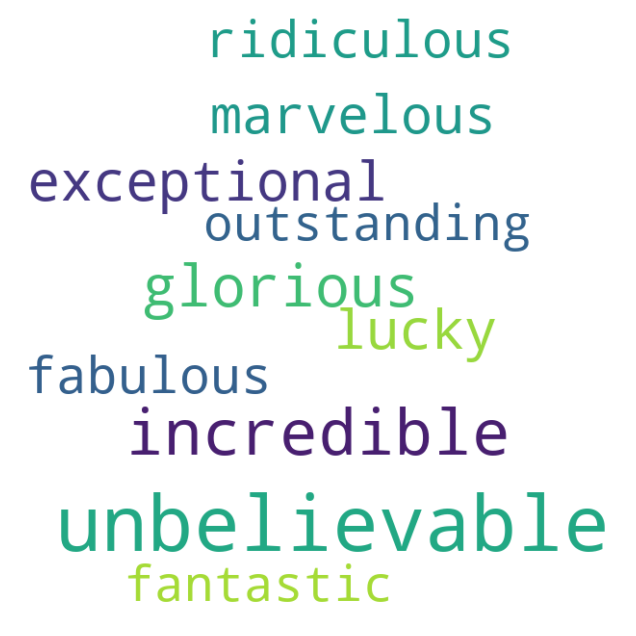

In [34]:
#create word cloud
wcloud = WordCloud(width=640, height=640, background_color='white',
                  max_words=10).generate_from_frequencies(words)
#set plot parameters
plt.figure(figsize=(8,8))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
#create word dictionary from df values
words = pd.Series(df_jj_top_good_ratios.good_ratio.values,
                  index=df_jj_top_good_ratios.word).to_dict()

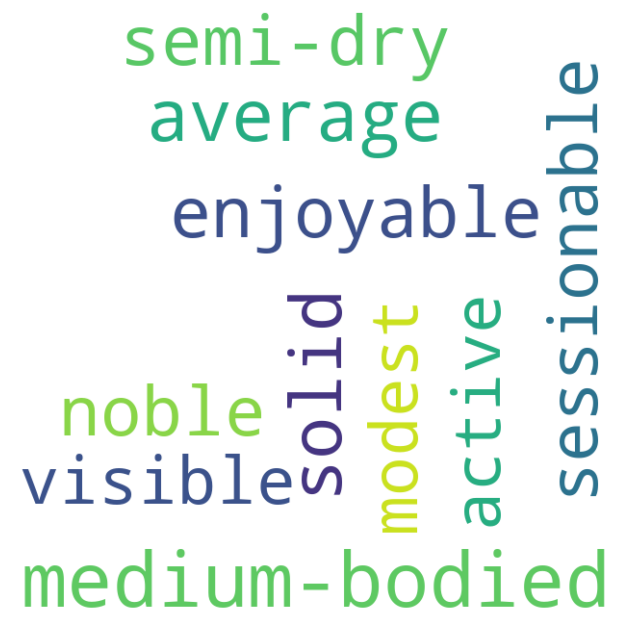

In [36]:
#create word cloud
wcloud = WordCloud(width=640, height=640, background_color='white',
                  max_words=10).generate_from_frequencies(words)
#set plot parameters
plt.figure(figsize=(8,8))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word clouds do not show good comparative results, will create bar charts<br>

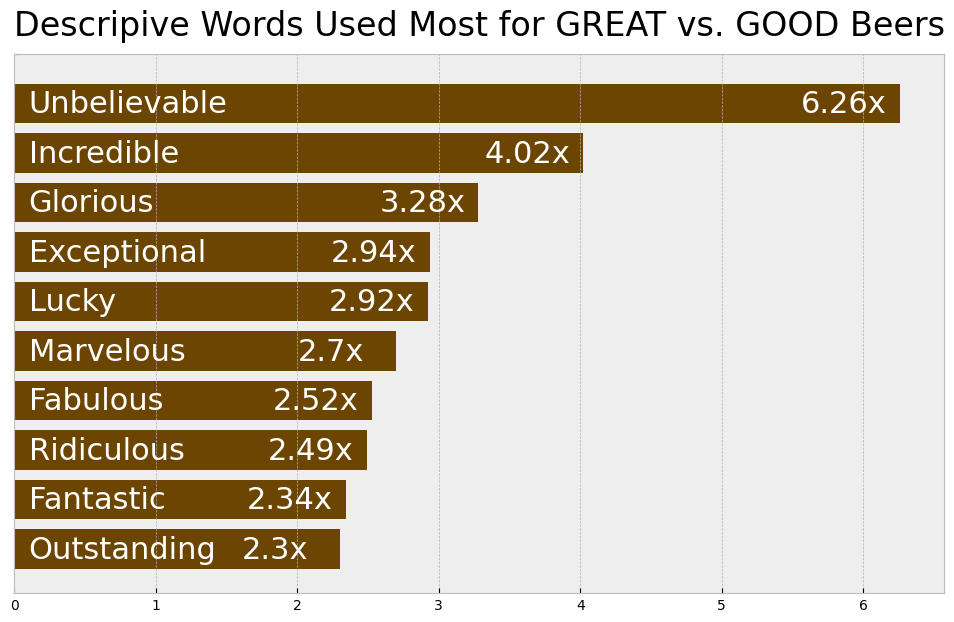

In [37]:
#define data to be used
words = df_jj_top_great_ratios.word.head(10).tolist()
ratios = df_jj_top_great_ratios.great_ratio.head(10).tolist()

#reverse order to show highest values on top
words.reverse()
ratios.reverse()

#set plot parameters
plt.style.use('bmh')
plt.figure(figsize=(12,7))

#create data labels for word and ratio values to be displayed on the bars
for i, (p, pr) in enumerate(zip(words, ratios)):
    plt.text(s=p.capitalize(), x=0.1, y=i, color="w", verticalalignment="center", size=22)
    plt.text(s=str(round(pr,2))+'x', x=pr-0.7, y=i, color="w",
             verticalalignment="center", horizontalalignment="left", size=22)

#set additional plot parameters
plt.barh(words, ratios, color='#6C4501')
plt.title('Descripive Words Used Most for GREAT vs. GOOD Beers', y=1.02, size=24)
#plt.title('Most Used Descripive Words for GREAT Beers Compared with GOOD Beers', y=1.08, size=18)
#plt.suptitle('Length indicates how many more times descriptive words were used for great vs. good beers', 
#             y=0.93, fontsize=12)

plt.yticks('')

#show plot
plt.show()

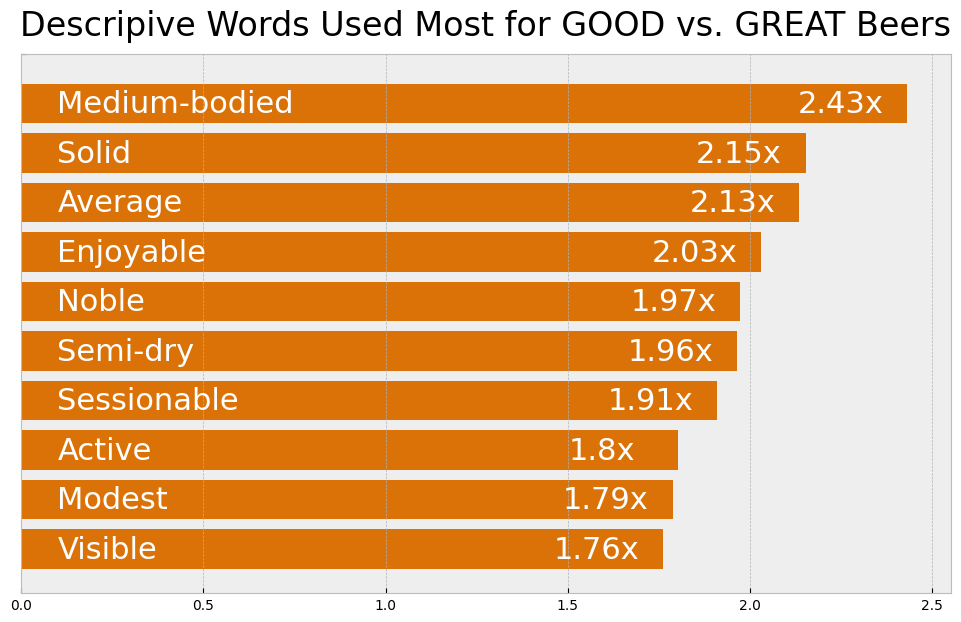

In [38]:
#define data to be used
words = df_jj_top_good_ratios.word.head(10).tolist()
ratios = df_jj_top_good_ratios.good_ratio.head(10).tolist()

#reverse order to show highest values on top
words.reverse()
ratios.reverse()

#set plot parameters
plt.style.use('bmh')
plt.figure(figsize=(12,7))

#create data labels for word and ratio values to be displayed on the bars
for i, (p, pr) in enumerate(zip(words, ratios)):
    plt.text(s=p.capitalize(), x=0.1, y=i, color="w", verticalalignment="center", size=22)
    plt.text(s=str(round(pr,2))+'x', x=pr-0.3, y=i, color="w",
             verticalalignment="center", horizontalalignment="left", size=22)

#set additional plot parameters
plt.barh(words, ratios, color='#DA7207')

plt.title('Descripive Words Used Most for GOOD vs. GREAT Beers', y=1.02, size=24)
#plt.title('Most Used Descripive Words for GOOD Beers Compared with GREAT Beers', y=1.08, size=18)
#plt.suptitle('Length indicates how many more times descriptive words were used for good vs. great beers', 
#            y=0.93, fontsize=12)

plt.yticks('')

#show plot
plt.show()